In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [61]:
# Samsung Electronics Co., ltd (2016 ~ 2020)
prices = fdr.DataReader('005930', '2016','2021')['Close']
log_return = np.log(prices) - np.log(prices.shift(1))
vol = log_return.std()

In [62]:
# Random Walk
def randomwalk(price, vol, days=100):
    simulated_prices = []
    last_price = price[-1]
    for i in range(days):
        last_price  = last_price + last_price * np.random.normal(0, vol)
        simulated_prices.append(last_price)
    return price[-1], list(range(days)), simulated_prices

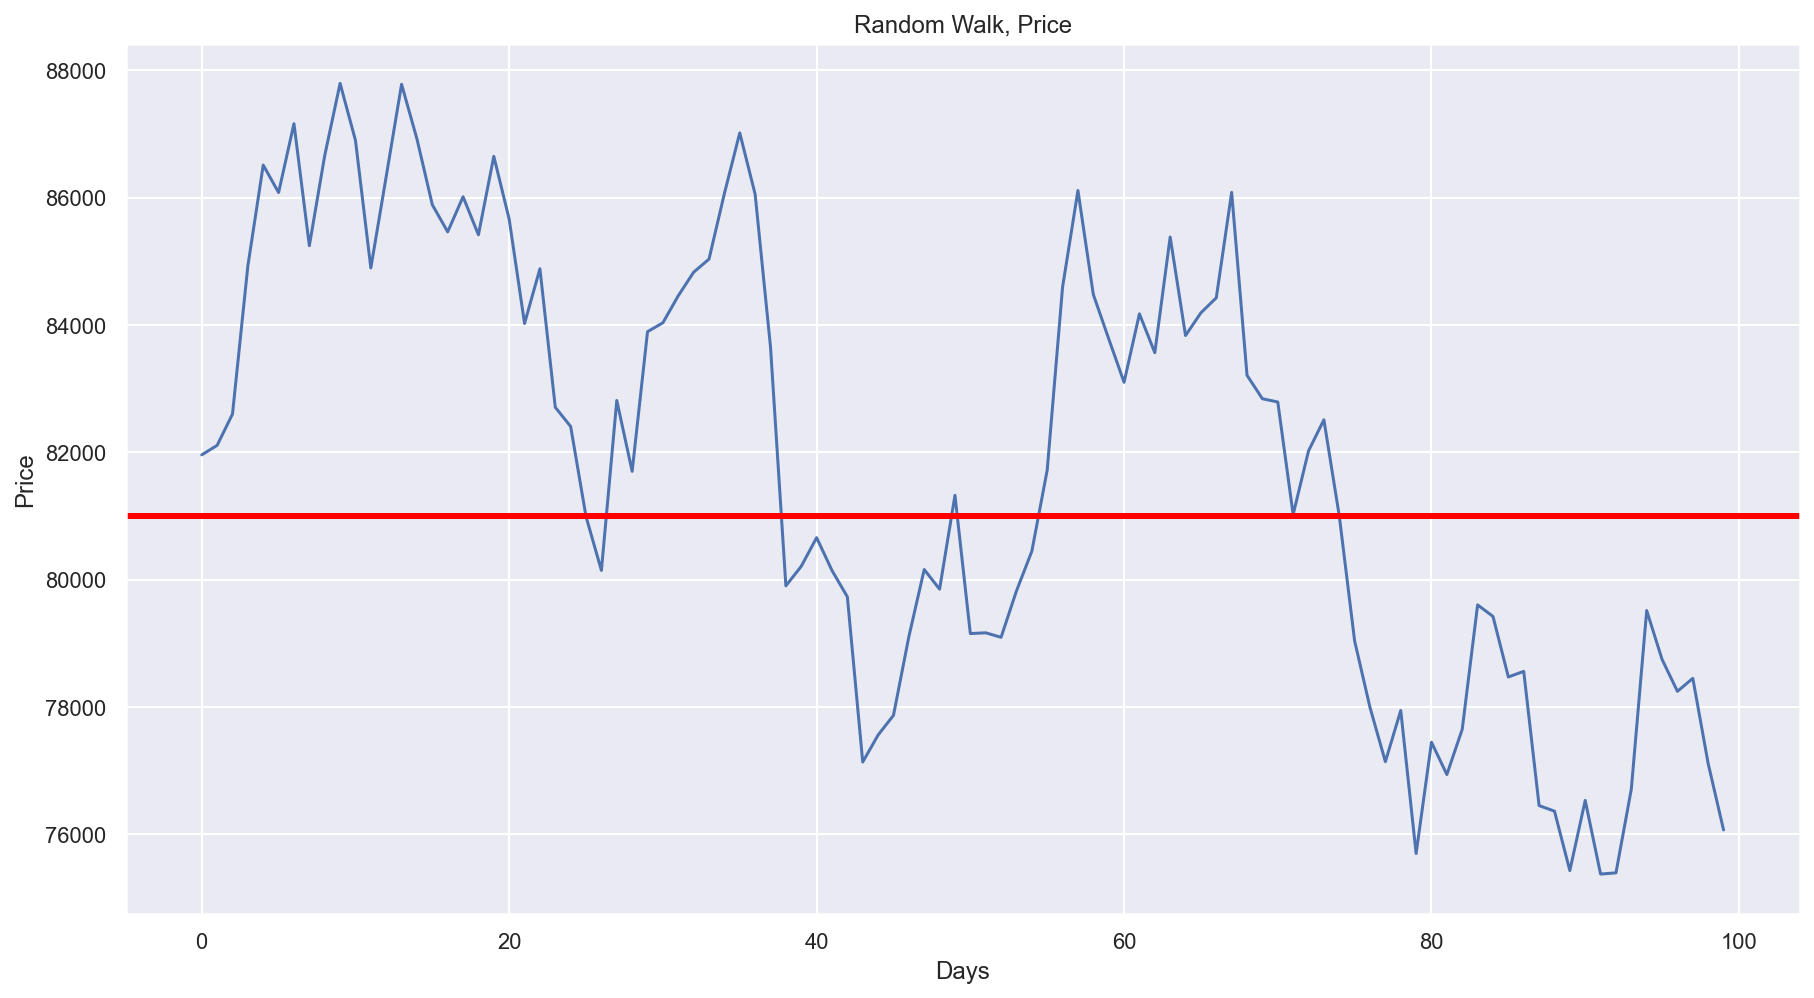

In [67]:
# visualize
plt.figure(figsize=(15,8))
start, ls, simulated_prices = randomwalk(prices, vol, days=100)
plt.plot(ls, simulated_prices)
plt.title("Random Walk, Price")
plt.axhline(start, color='red', lw=3)
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

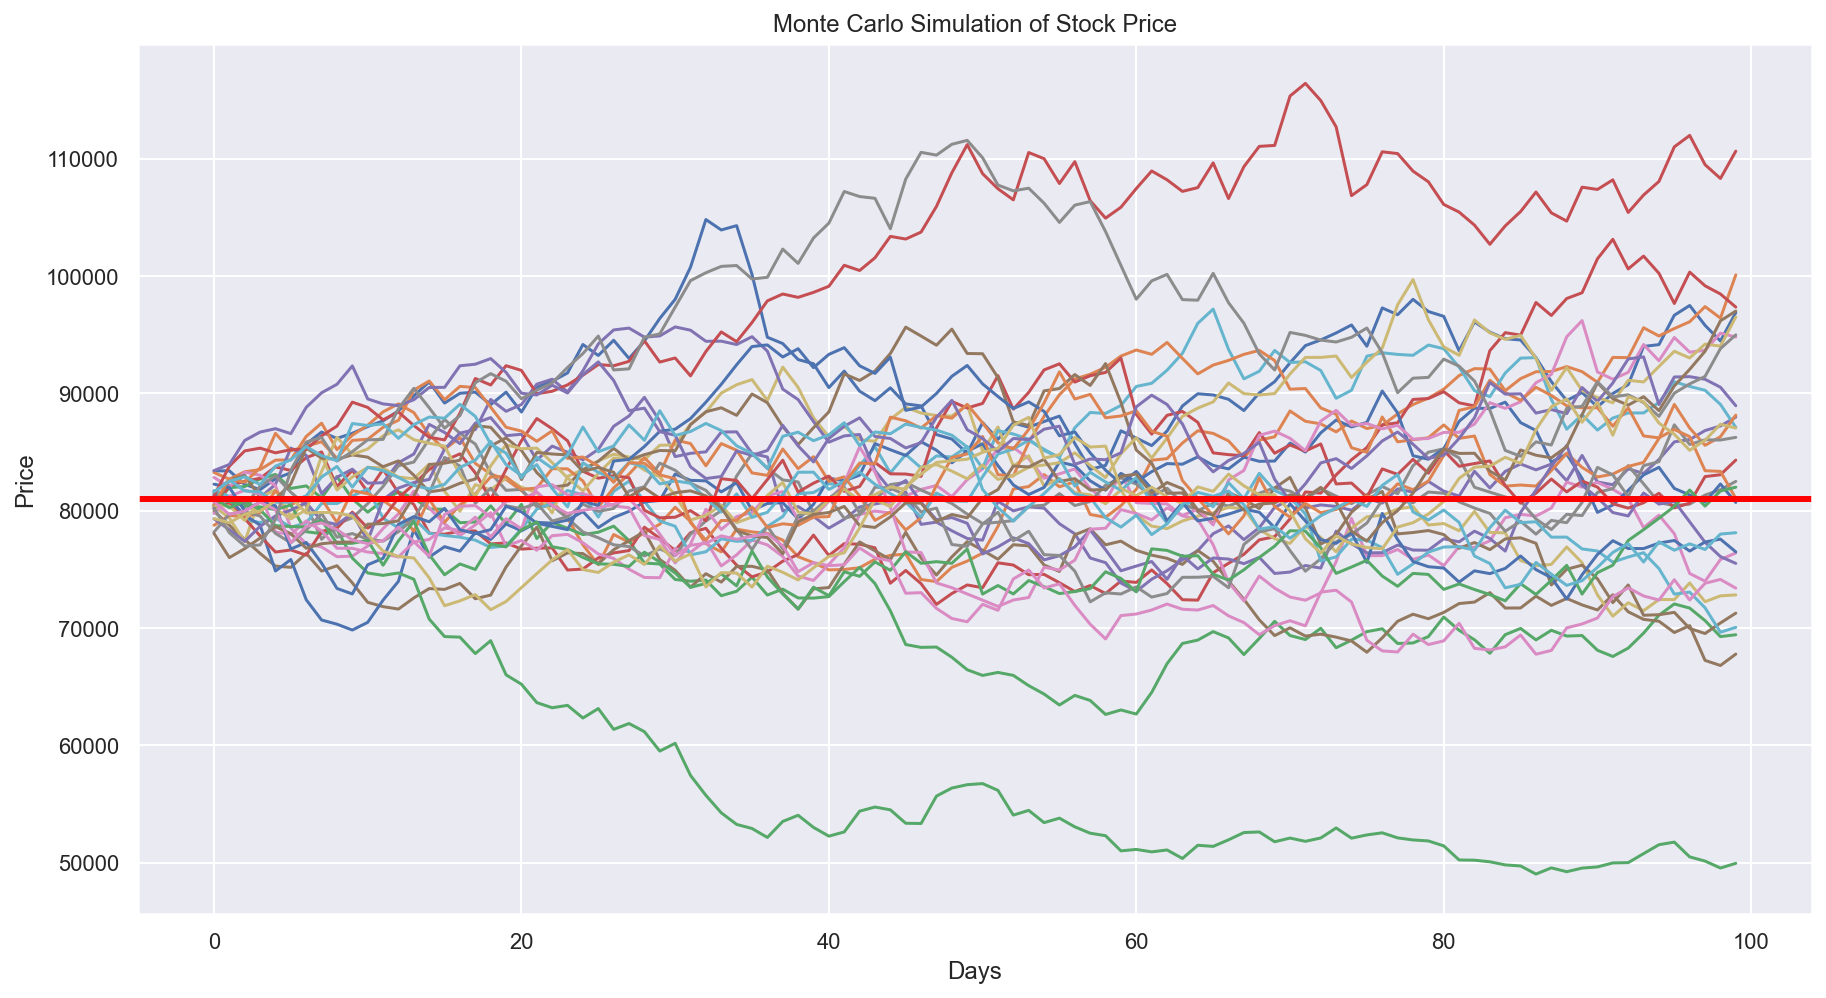

In [68]:
# Monte Carlo Simulation
plt.figure(figsize=(15,8))
for _ in range(30):
    start, ls, simulated_prices = randomwalk(prices, vol, days=100)
    plt.plot(ls, simulated_prices)
plt.title("Monte Carlo Simulation of Stock Price")
plt.axhline(start, color='red', lw=3)
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()